So far we have seen that passive cable theory can explain the observed subthreshold effects. Next, we saw that those subthreshold effects can predict suprathreshold effects (entrainment) proportionally to the distance between the ES and FR frequencies (something already known in the literature - Arnold tongues).

We saw cell type specific effects, similar to in vitro experiments (Soo), however, those experiments were specifically designed to ignore the morphology of the cells. Thus, whether the existing optimized dendrite conductances are capable to conduct, and how well or consistent they do it, remains unknown.

In [1]:
from Functions import *

Here, we try to evaluate some of those existing, optimized, conductance sets, regarding their ability to conduct, and compare them with equivalent passive simulations. To do that, we attach an artificial long dendrite (which you can call axon) at the bottom of each of our 200 cells. Its length is 2mm and its radius is 0.4um.

This is an 'illegal' move, since it breaks the ability of the models to perform as optimized. However, all we need them to do, is to create a nice spike, so we can observe how it propagates in our custom long axon. Due to the high amplitude of the spike, this should make it clear, whether the ion conductances have any extra contribution beyond the cable theory model.

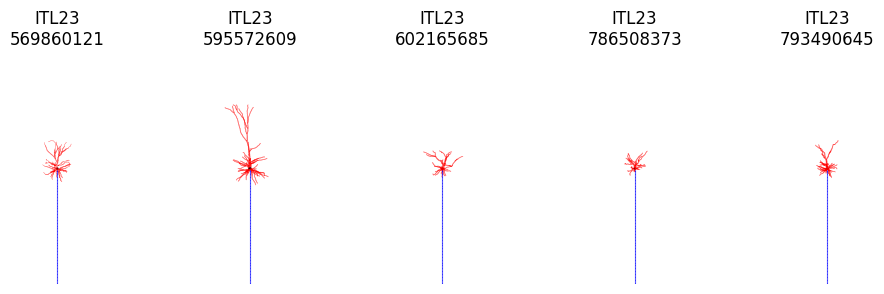

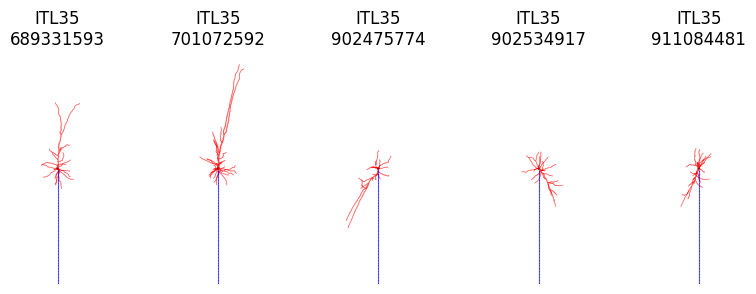

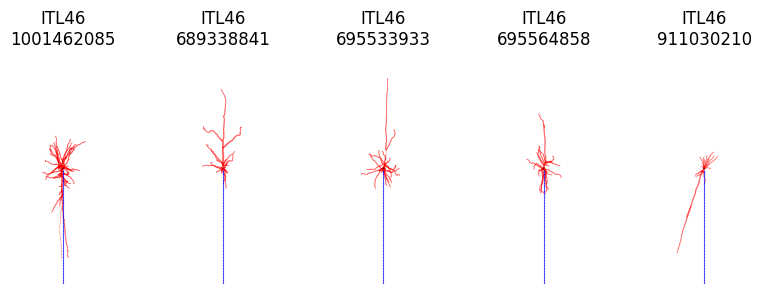

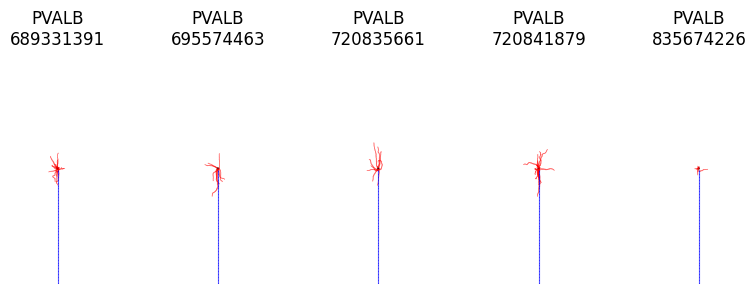

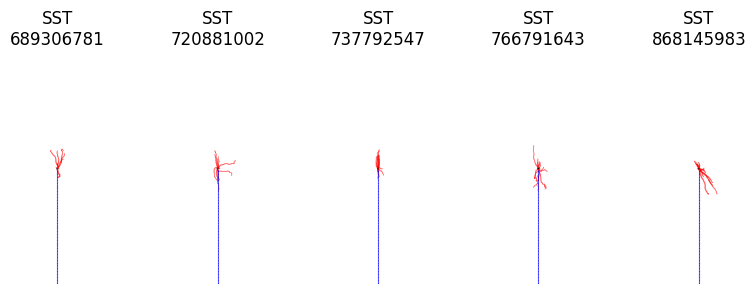

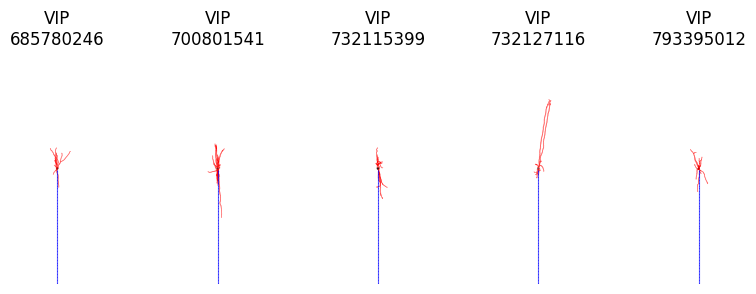

In [2]:
Plot_morphologies()

The first thing that we observe is that some cells are upside down. Which should not happen. It remains to be cleared, because in the previous notebooks we talked about prefered sensitivities.

From the entirety of our cells, around 10% is capable to withstand the custom axon addition, without significant impact on their performance. Note that we just instantiated them with an average DC injection of 0.3pA. More cells are able to withstand the axon change if we carefully select a proper DC injection for each. However, for our target, the 17 remaining cells are good to show some conductivity comparisons.

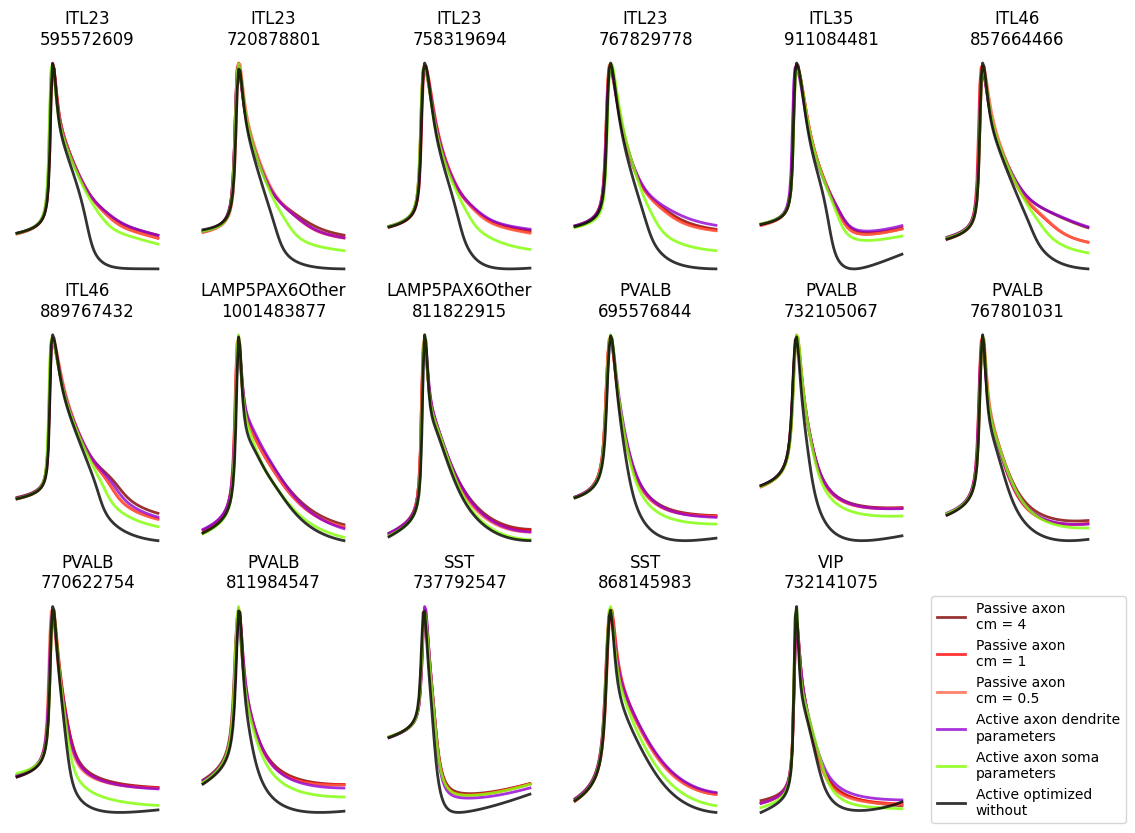

In [3]:
Manual_picked_model_list = [595572609, 720878801, 758319694, 767829778, 911084481, 857664466, 889767432, 1001483877,
                            811822915, 695576844, 720855760, 732105067, 767801031, 770622754, 811984547, 868145983, 
                            737792547, 732141075]
all_axon_result = Plot_custom_axon_spikes(Manual_picked_model_list)

As shown, we instantiate 5 custom scenarios. 3 passive, with the first one (cm=4) being identical to the early passive simulations (first notebook), while the other two with lower capacitances, in order to investigate the impact of myelination. The last two scenarios copy the active optimized parameters, either from the dendrites or from the soma, for each of the cells.

Now we can compare the propagation delay, and the amplitude drop across our custom axon for each case.

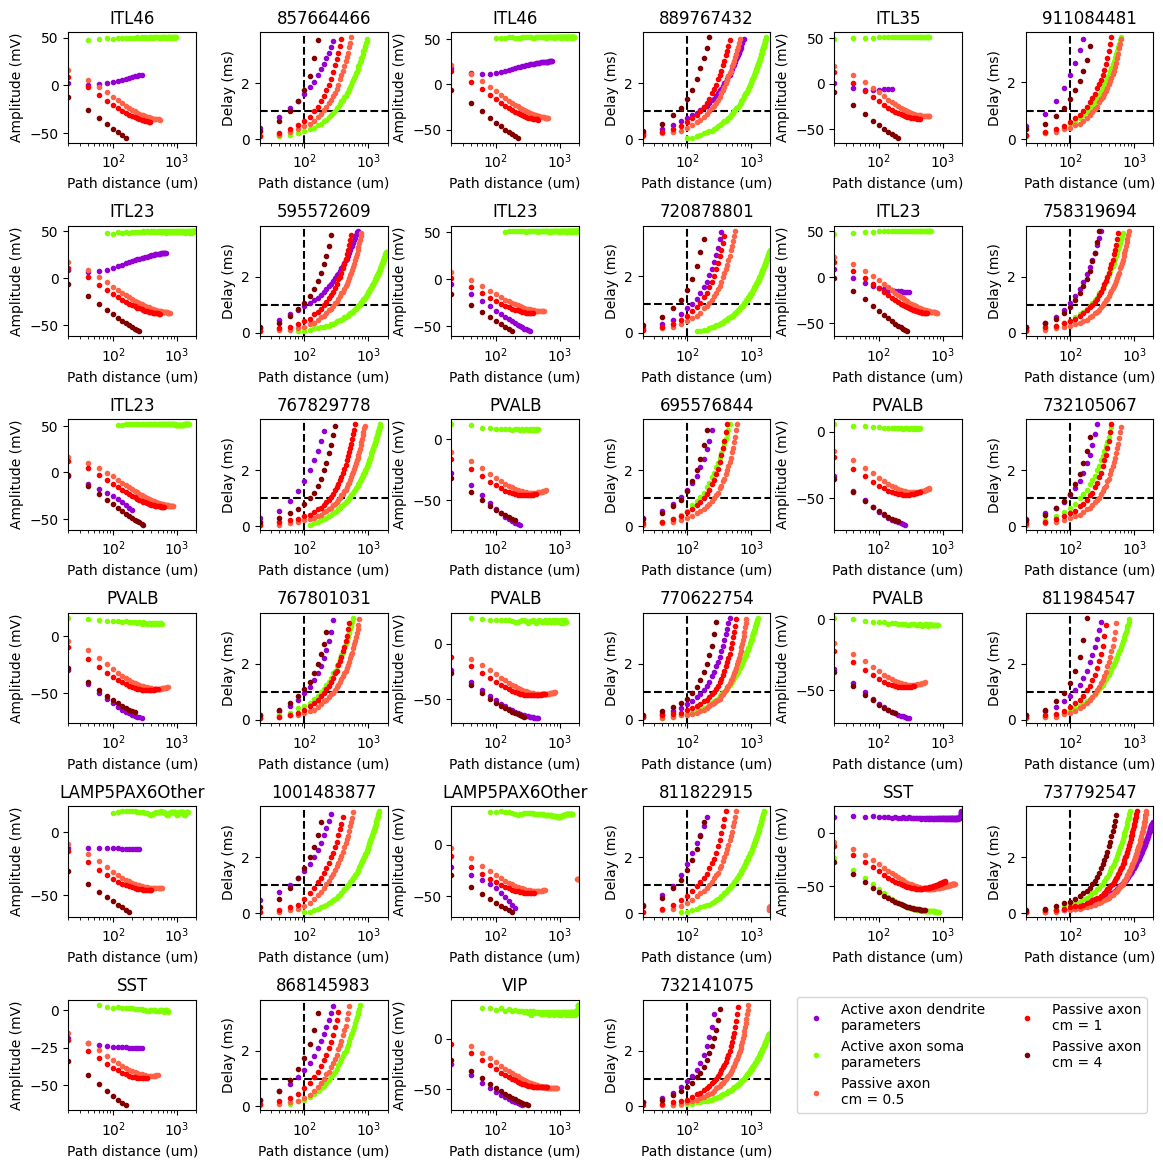

In [4]:
Plot_axon_propagation(all_axon_result)

Those results are rather interesting. First, if we compare the delay, we see that is always (for all cells and custom axon options) very close to a typical value of 1ms/100um (cross marked), as observed in vivo npx data in humans (Vitalie). We see that the soma set usually shows the lowest delay. The dendrite set usually has the highest delay, almost identical with the high capacitance passive axons, while the low capacitance passive axons stand in between.

If we now see the amplitude drop, we see a very quick drop for all passive axons (quicker for higher cm), and unfortunately, the dendrite parameters usually show a response very close to the high cm passive case. This means that existing optimizations do not give any significant enhancement on the dendrites (compared for example with a perisomatic optimization), and explains why our morphology investigations showed very close behavior between active and passive simulations.

On the other hand, soma sets show a nice boosting behavior, fully desired, especially for axons. At the same time some dendrite sets can also capture this boosting behavior, indicating that future optimizations can use this attenuation restriction as an optimization check point.

To further support that current models are not consistently optimized towards this aspect, we can use the hall of fame models. If we repeat the above custom axon changes with dendrite parameters across the first 6 hall of fame models for each cell, we will see that there is big amplitude variation, despite the fact that all of them are succesfully optimized to match the ephys set.

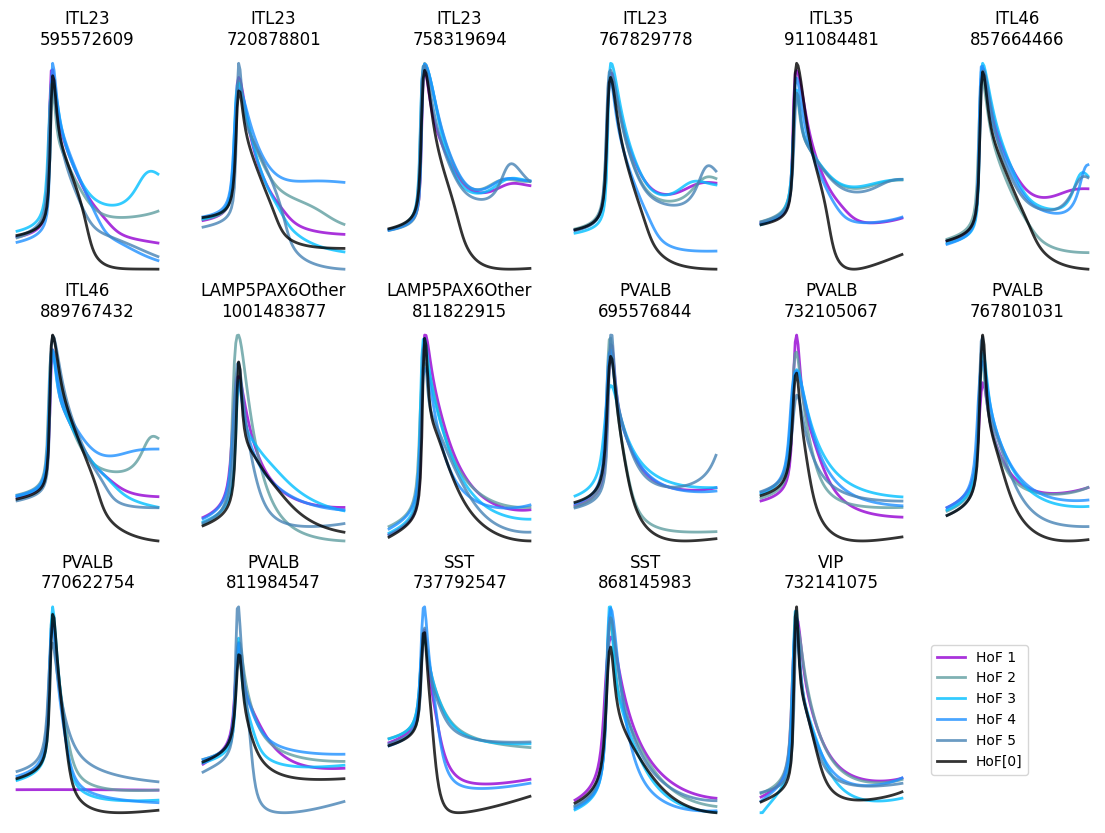

In [5]:
all_axon_result = Plot_custom_axon_spikes(Manual_picked_model_list, hof = True)

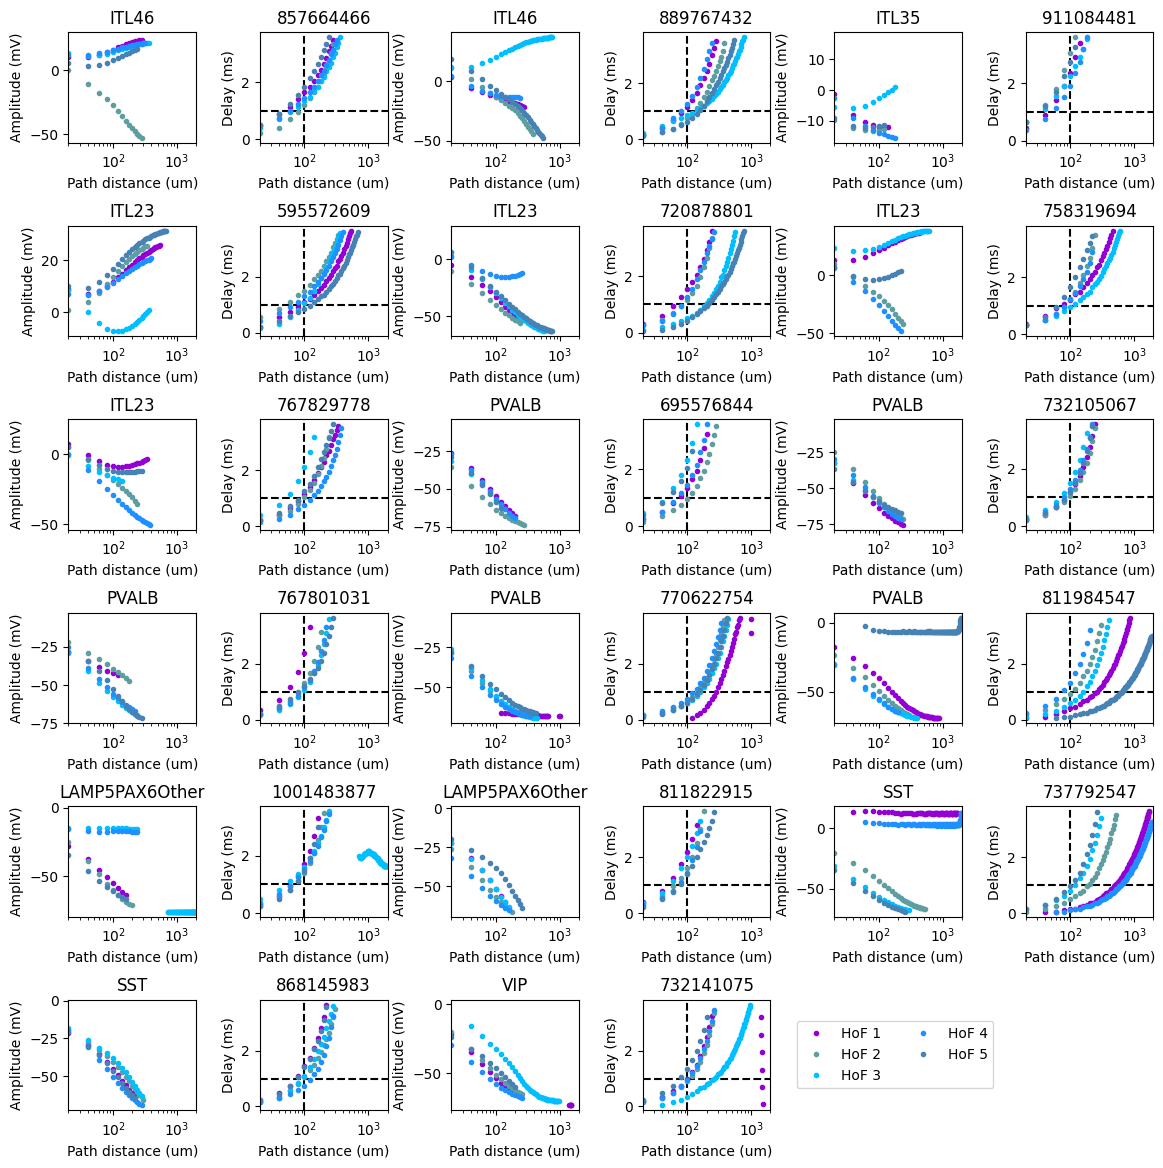

In [6]:
Plot_axon_propagation(all_axon_result)

It seems that most of cells have at least one hof with boosting and one hof without boosting.

The last step to conclude this story, is to find out which of the above conductances are the correct ones. To do that, we will try to initiate spiking through ES. We have already seen that sinewave ES cannot initiate spiking at amplitudes allowed for in vivo human ES. However pulse ES can go much higher, and experimental results show that such pulses are able to initiate spikes from very long distances. This can only be explained due to the intracellular propagation, and the different attenuations should have significant impact on it.

We will place a point ES probe, injecting pulses close to our custom axon, at various distances and with various amplitudes. We will do that for the boosting and non boosting cases, and will try to define the minimum pulse to trigger the cell at each occasion.

In [7]:
# TODO